In [19]:
def stringArchivos_toList(estado):
    # Crea una lista con 12 strings, para las 12 baterias en un estado
    # Cada string es el nombre de de un archivo txt
    
    lista_nombres = []      # crear lista vacia
    nombre_base = "EIS_state_"      # primera parte del nombre
    # State X_25C0i
    for i in range (1,9):   # agregar segunda parte para 25 °C
        nombre_armar = nombre_base+estado+"_25C0" + str(i)
        lista_nombres.append(nombre_armar)

    # State X_350Ci
    for i in range (1,3):   # agregar segunda parte para 25 °C
        nombre_armar = nombre_base + estado + "_35C0" + str(i)
        lista_nombres.append(nombre_armar)

    # State X_450Ci
    for i in range (1,3):   # agregar segunda parte para 25 °C
        nombre_armar = nombre_base + estado + "_45C0" + str(i)
        lista_nombres.append(nombre_armar)

    return lista_nombres

In [30]:
# Crear 6 listas con los nombres de archivos de cada estado como string
# Estos 6 estados son los cuales tienen sus archivos regulares, es decir,
# Tienen 8 baterias para 25°C, 2 baterias para 35°C y 2 baterias para 45°C
lista_stateI = stringArchivos_toList("I")
lista_stateII = stringArchivos_toList("II")
lista_stateIII = stringArchivos_toList("III")
lista_stateIV = stringArchivos_toList("IV")
lista_stateIX = stringArchivos_toList("IX")
lista_stateV = stringArchivos_toList("V")

In [34]:
# Check de las listas creadas
print(len(lista_stateII))
print(len(lista_stateII))
print(len(lista_stateIII))
print(len(lista_stateIV))
print(len(lista_stateIX))
print(len(lista_stateV))

12
12
12
12
12
12


In [37]:
# Se crea una septima lista con todos los strings de archivos restantes
nombre_base = "EIS_state_"
lista_nombres = []
nombre_armar = ""

# A partir del nombre base se crean los nuevos stirngs

### ESTADO VI
# State VI 25 Ci
lista_nombres.append(nombre_base+"VI"+"_25C01")
lista_nombres.append(nombre_base+"VI"+"_25C02")
lista_nombres.append(nombre_base+"VI"+"_25C03")
lista_nombres.append(nombre_base+"VI"+"_25C05")
lista_nombres.append(nombre_base+"VI"+"_25C06")
lista_nombres.append(nombre_base+"VI"+"_25C07")
lista_nombres.append(nombre_base+"VI"+"_25C08")
lista_nombres.append(nombre_base+"VI"+"_25C42")


## ESTADO VII
lista_nombres.append(nombre_base+"VII"+"_25C04")
lista_nombres.append(nombre_base+"VII"+"_25C06")
lista_nombres.append(nombre_base+"VII"+"_25C07")
lista_nombres.append(nombre_base+"VII"+"_25C08")

## ESTADO VIII
# State VI_35 Ci
lista_nombres.append(nombre_base+"VIII"+"_25C04")
lista_nombres.append(nombre_base+"VIII"+"_25C06")
lista_nombres.append(nombre_base+"VIII"+"_25C07")
lista_nombres.append(nombre_base+"VIII"+"_25C08")


In [38]:
# Check de la ultima lista creada
print(len(lista_nombres))

16


In [39]:
# Todas las listas se concatenan en una unica
listArchivos = (lista_stateI
                +lista_stateII
                +lista_stateIII
                +lista_stateIV
                +lista_stateIX
                +lista_stateV
                +lista_nombres
)
# Check de la ultima lista
print(len(listArchivos))
print(listArchivos)

88
['EIS_state_I_25C01', 'EIS_state_I_25C02', 'EIS_state_I_25C03', 'EIS_state_I_25C04', 'EIS_state_I_25C05', 'EIS_state_I_25C06', 'EIS_state_I_25C07', 'EIS_state_I_25C08', 'EIS_state_I_35C01', 'EIS_state_I_35C02', 'EIS_state_I_45C01', 'EIS_state_I_45C02', 'EIS_state_II_25C01', 'EIS_state_II_25C02', 'EIS_state_II_25C03', 'EIS_state_II_25C04', 'EIS_state_II_25C05', 'EIS_state_II_25C06', 'EIS_state_II_25C07', 'EIS_state_II_25C08', 'EIS_state_II_35C01', 'EIS_state_II_35C02', 'EIS_state_II_45C01', 'EIS_state_II_45C02', 'EIS_state_III_25C01', 'EIS_state_III_25C02', 'EIS_state_III_25C03', 'EIS_state_III_25C04', 'EIS_state_III_25C05', 'EIS_state_III_25C06', 'EIS_state_III_25C07', 'EIS_state_III_25C08', 'EIS_state_III_35C01', 'EIS_state_III_35C02', 'EIS_state_III_45C01', 'EIS_state_III_45C02', 'EIS_state_IV_25C01', 'EIS_state_IV_25C02', 'EIS_state_IV_25C03', 'EIS_state_IV_25C04', 'EIS_state_IV_25C05', 'EIS_state_IV_25C06', 'EIS_state_IV_25C07', 'EIS_state_IV_25C08', 'EIS_state_IV_35C01', 'EIS_s

In [40]:
# Crear archivo CSV
# Toma los archivos txt presentes en la carpeta y reemplaza
# los espacios por comas. De esta forma es más fácil crear
# un DataFrame con pandas.
# Código creado con ChatGPT

import csv

# Se itera 88 veces
for name in listArchivos:
    # Ruta del archivo de texto con los datos
    input_file = name+".txt"

    # Leer los datos del archivo de texto
    data = []
    with open(input_file, 'r') as file:
        # Saltar la primera línea (encabezados)
        next(file)
        for line in file:
            # Separar los valores por espacios y convertirlos a números
            values = [float(val) for val in line.split()]
            data.append(values)

    # Nombre del archivo de salida
    output_file = name+".csv"

    # Escribir los datos en el archivo CSV
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["time/s", "cycle number", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "|Z|/Ohm", "Phase(Z)/deg"])
        writer.writerows(data)

    print(f"Se ha creado el archivo {output_file} con éxito.")

Se ha creado el archivo EIS_state_I_25C01.csv con éxito.
Se ha creado el archivo EIS_state_I_25C02.csv con éxito.
Se ha creado el archivo EIS_state_I_25C03.csv con éxito.
Se ha creado el archivo EIS_state_I_25C04.csv con éxito.
Se ha creado el archivo EIS_state_I_25C05.csv con éxito.
Se ha creado el archivo EIS_state_I_25C06.csv con éxito.
Se ha creado el archivo EIS_state_I_25C07.csv con éxito.
Se ha creado el archivo EIS_state_I_25C08.csv con éxito.
Se ha creado el archivo EIS_state_I_35C01.csv con éxito.
Se ha creado el archivo EIS_state_I_35C02.csv con éxito.
Se ha creado el archivo EIS_state_I_45C01.csv con éxito.
Se ha creado el archivo EIS_state_I_45C02.csv con éxito.
Se ha creado el archivo EIS_state_II_25C01.csv con éxito.
Se ha creado el archivo EIS_state_II_25C02.csv con éxito.
Se ha creado el archivo EIS_state_II_25C03.csv con éxito.
Se ha creado el archivo EIS_state_II_25C04.csv con éxito.
Se ha creado el archivo EIS_state_II_25C05.csv con éxito.
Se ha creado el archivo EI

In [ ]:
# Crear archivo CSV
# Toma los archivos txt presentes en la carpeta y reemplaza
# los espacios por comas. De esta forma es más fácil crear
# un DataFrame con pandas.
# Código creado con ChatGPT

import csv

# Ruta del archivo de texto con los datos
input_file = "EIS_state_I_25C01.txt"

# Leer los datos del archivo de texto
data = []
with open(input_file, 'r') as file:
    # Saltar la primera línea (encabezados)
    next(file)
    for line in file:
        # Separar los valores por espacios y convertirlos a números
        values = [float(val) for val in line.split()]
        data.append(values)

# Nombre del archivo de salida
output_file = "algo.csv"

# Escribir los datos en el archivo CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["time/s", "cycle number", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "|Z|/Ohm", "Phase(Z)/deg"])
    writer.writerows(data)

print(f"Se ha creado el archivo {output_file} con éxito.")

In [24]:
print(listArchivos)

['EIS_state_I_25C01', 'EIS_state_I_25C02', 'EIS_state_I_25C03', 'EIS_state_I_25C04', 'EIS_state_I_25C05', 'EIS_state_I_25C06', 'EIS_state_I_25C07', 'EIS_state_I_25C08', 'EIS_state_I_35C01', 'EIS_state_I_35C02', 'EIS_state_I_45C01', 'EIS_state_I_45C02', 'EIS_state_II_25C01', 'EIS_state_II_25C02', 'EIS_state_II_25C03', 'EIS_state_II_25C04', 'EIS_state_II_25C05', 'EIS_state_II_25C06', 'EIS_state_II_25C07', 'EIS_state_II_25C08', 'EIS_state_II_35C01', 'EIS_state_II_35C02', 'EIS_state_II_45C01', 'EIS_state_II_45C02', 'EIS_state_III_25C01', 'EIS_state_III_25C02', 'EIS_state_III_25C03', 'EIS_state_III_25C04', 'EIS_state_III_25C05', 'EIS_state_III_25C06', 'EIS_state_III_25C07', 'EIS_state_III_25C08', 'EIS_state_III_35C01', 'EIS_state_III_35C02', 'EIS_state_III_45C01', 'EIS_state_III_45C02', 'EIS_state_IV_25C01', 'EIS_state_IV_25C02', 'EIS_state_IV_25C03', 'EIS_state_IV_25C04', 'EIS_state_IV_25C05', 'EIS_state_IV_25C06', 'EIS_state_IV_25C07', 'EIS_state_IV_25C08', 'EIS_state_IV_35C01', 'EIS_stat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("datos_csv.csv",sep=',', header=0, index_col=False)
df.head(5)

,time/s,cycle number,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,|Z|/Ohm,Phase(Z)/deg
0,7520.78391,1.0,20004.4530,0.40128,-0.02956,0.40237,4.21264
1,7520.92691,1.0,15829.1260,0.40688,-0.01046,0.40701,1.47198
2,7521.06891,1.0,12516.7030,0.41389,0.00415,0.41391,-0.57420
3,7521.21091,1.0,9909.4424,0.42152,0.01708,0.42187,-2.31990
4,7521.37491,1.0,7835.4800,0.42905,0.02692,0.42990,-3.59049


Text(0.5, 0, 'Re (Z)')

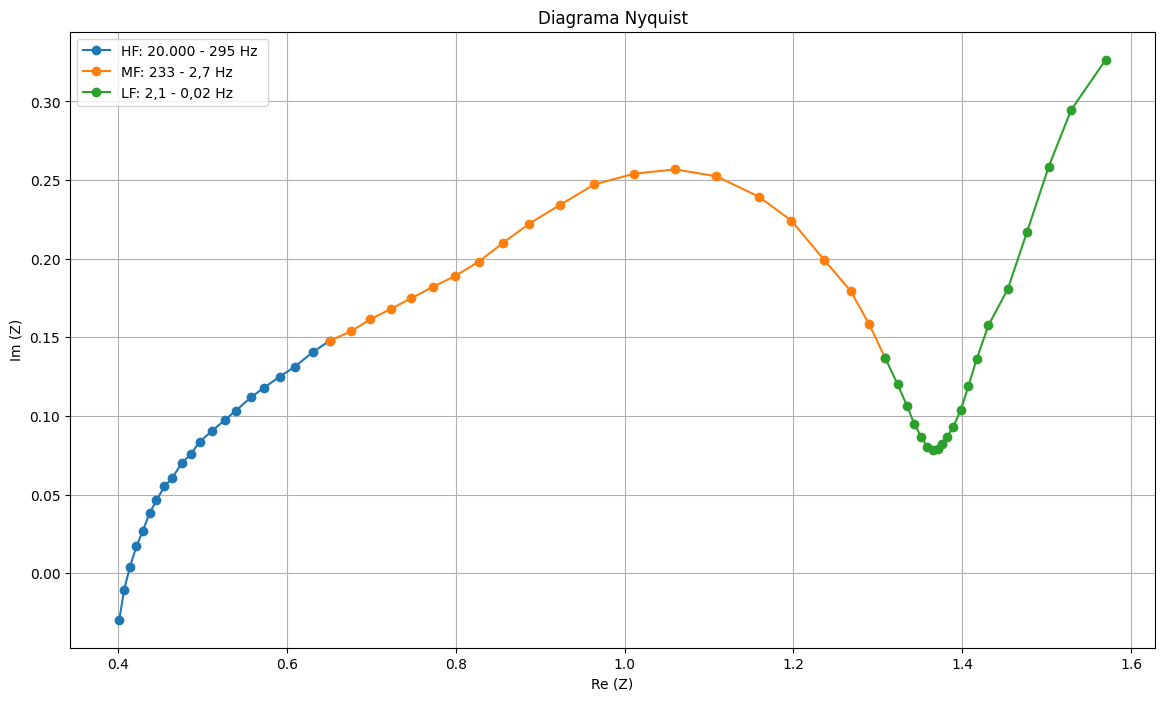

In [3]:
reZ = df["Re(Z)/Ohm"].to_list()
imZ = df["-Im(Z)/Ohm"].to_list()

plt.figure(figsize=(14,8))

plt.plot(reZ[0:20+1],imZ[0:20+1], marker='o', label="HF: 20.000 - 295 Hz ")
plt.plot(reZ[21-1:40+1],imZ[21-1:40+1], marker='o', label="MF: 233 - 2,7 Hz ")
plt.plot(reZ[41-1:60],imZ[41-1:60], marker='o', label="LF: 2,1 - 0,02 Hz ")
plt.legend()
plt.grid()
plt.title("Diagrama Nyquist")
plt.ylabel("Im (Z)")
plt.xlabel("Re (Z)")



In [12]:
lista_re = df["Re(Z)/Ohm"].to_list()


In [18]:
print(lista_re[0:3])

[0.40128, 0.40688, 0.41389]
